## 데이터셋 로드
https://www.kaggle.com/ronitf/heart-disease-uci

In [125]:
import pandas as pd
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## 1. Imputing

In [126]:
# 결측치 확인
data.isna().sum() / len(data) * 100

# 결측치 없음
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## 2. Encoding

In [127]:
# 순서가 없는 카테고리 column 들을 one-hot encoding
data = pd.get_dummies(data, columns=['cp', 'restecg', 'ca', 'thal'])
data.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,target,...,restecg_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,1,...,0,1,0,0,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,1,...,0,1,0,0,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,2,1,...,0,1,0,0,0,0,0,0,1,0
3,56,1,120,236,0,178,0,0.8,2,1,...,0,1,0,0,0,0,0,0,1,0
4,57,0,120,354,0,163,1,0.6,2,1,...,0,1,0,0,0,0,0,0,1,0


## 3. Outlier removing

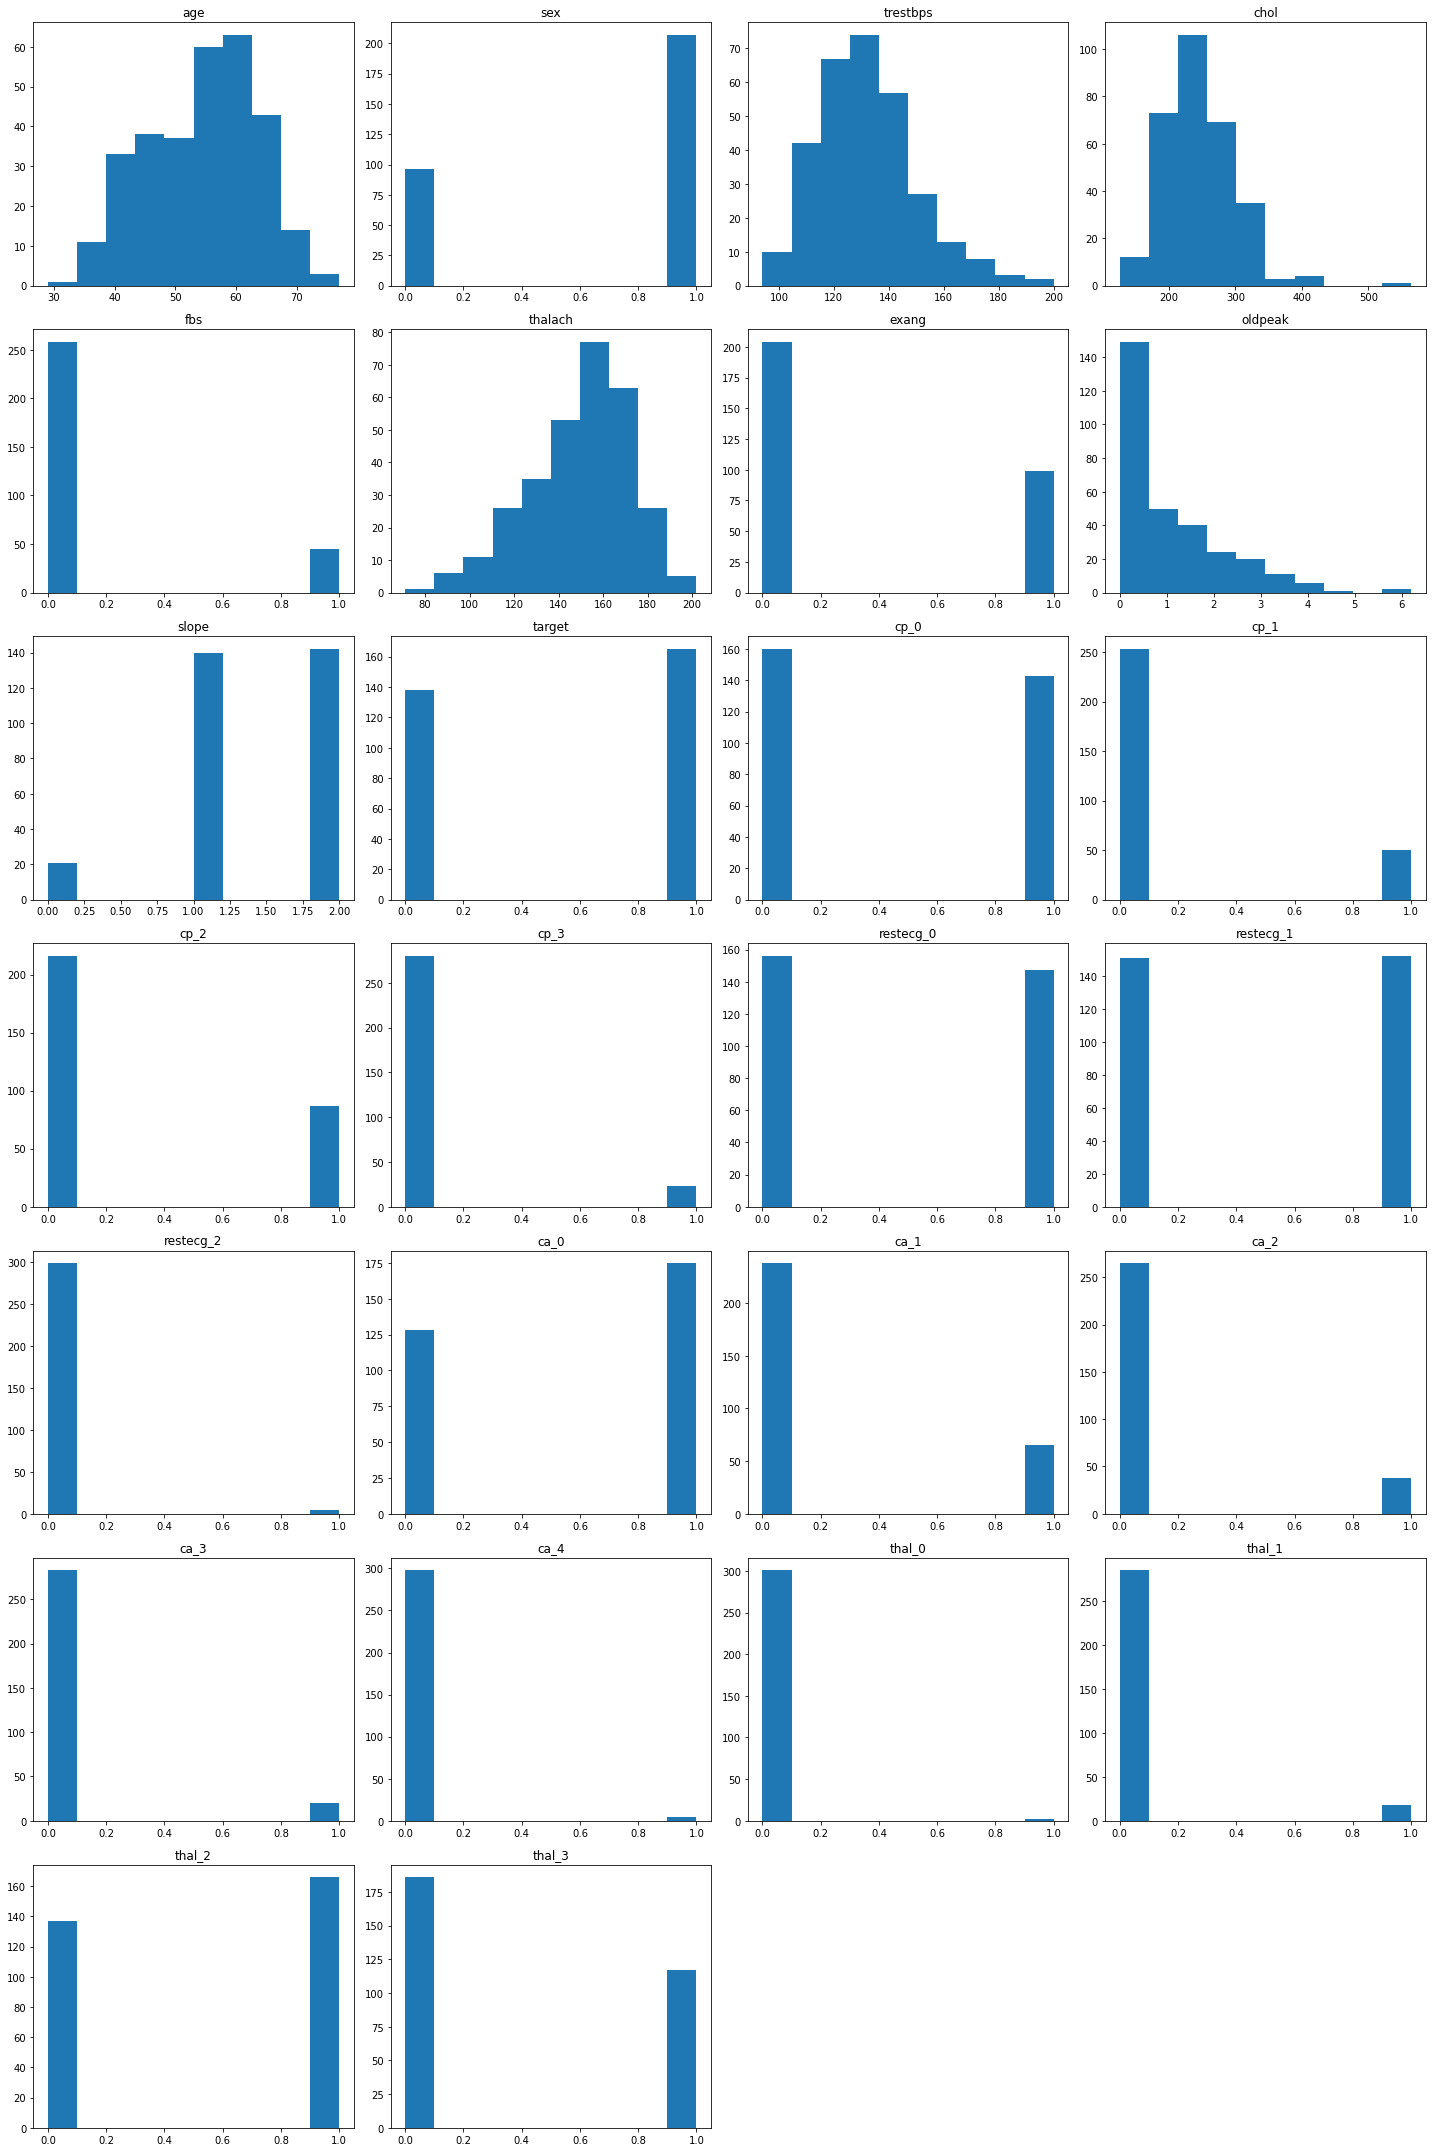

In [128]:
import matplotlib.pyplot as plt

# histogram 확인
plt.figure(figsize=(20, 30))
for i, col in enumerate(data.columns.to_list()):
    plt.subplot(7, 4, i + 1)
    plt.hist(data[col], label=col)
    plt.title(col)
    plt.tight_layout()

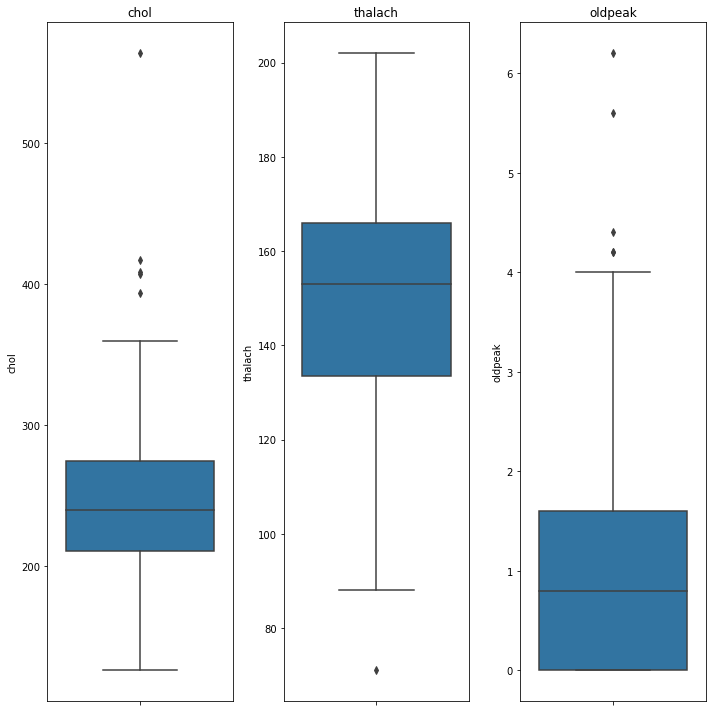

In [129]:
import seaborn as sns

# outlier 의심 column 확인
plt.figure(figsize=(10, 10))
for i, col in enumerate(['chol', 'thalach', 'oldpeak']):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=data, y=col)
    plt.title(col)
    plt.tight_layout()

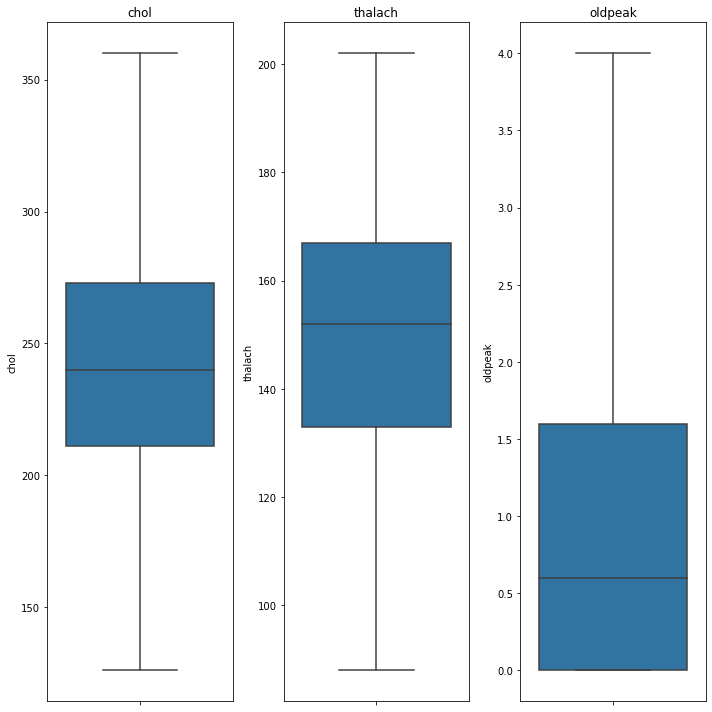

In [130]:
# iqr 밖의 값 제거
plt.figure(figsize=(10, 10))
for i, col in enumerate(['chol', 'thalach', 'oldpeak']):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    data = data.drop(data[(data[col] > q3 + 1.5 * iqr) | (data[col] < q1 - 1.5 * iqr)].index)
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=data, y=col)
    plt.title(col)
    plt.tight_layout()

## 4. Correlation removing

<AxesSubplot:>

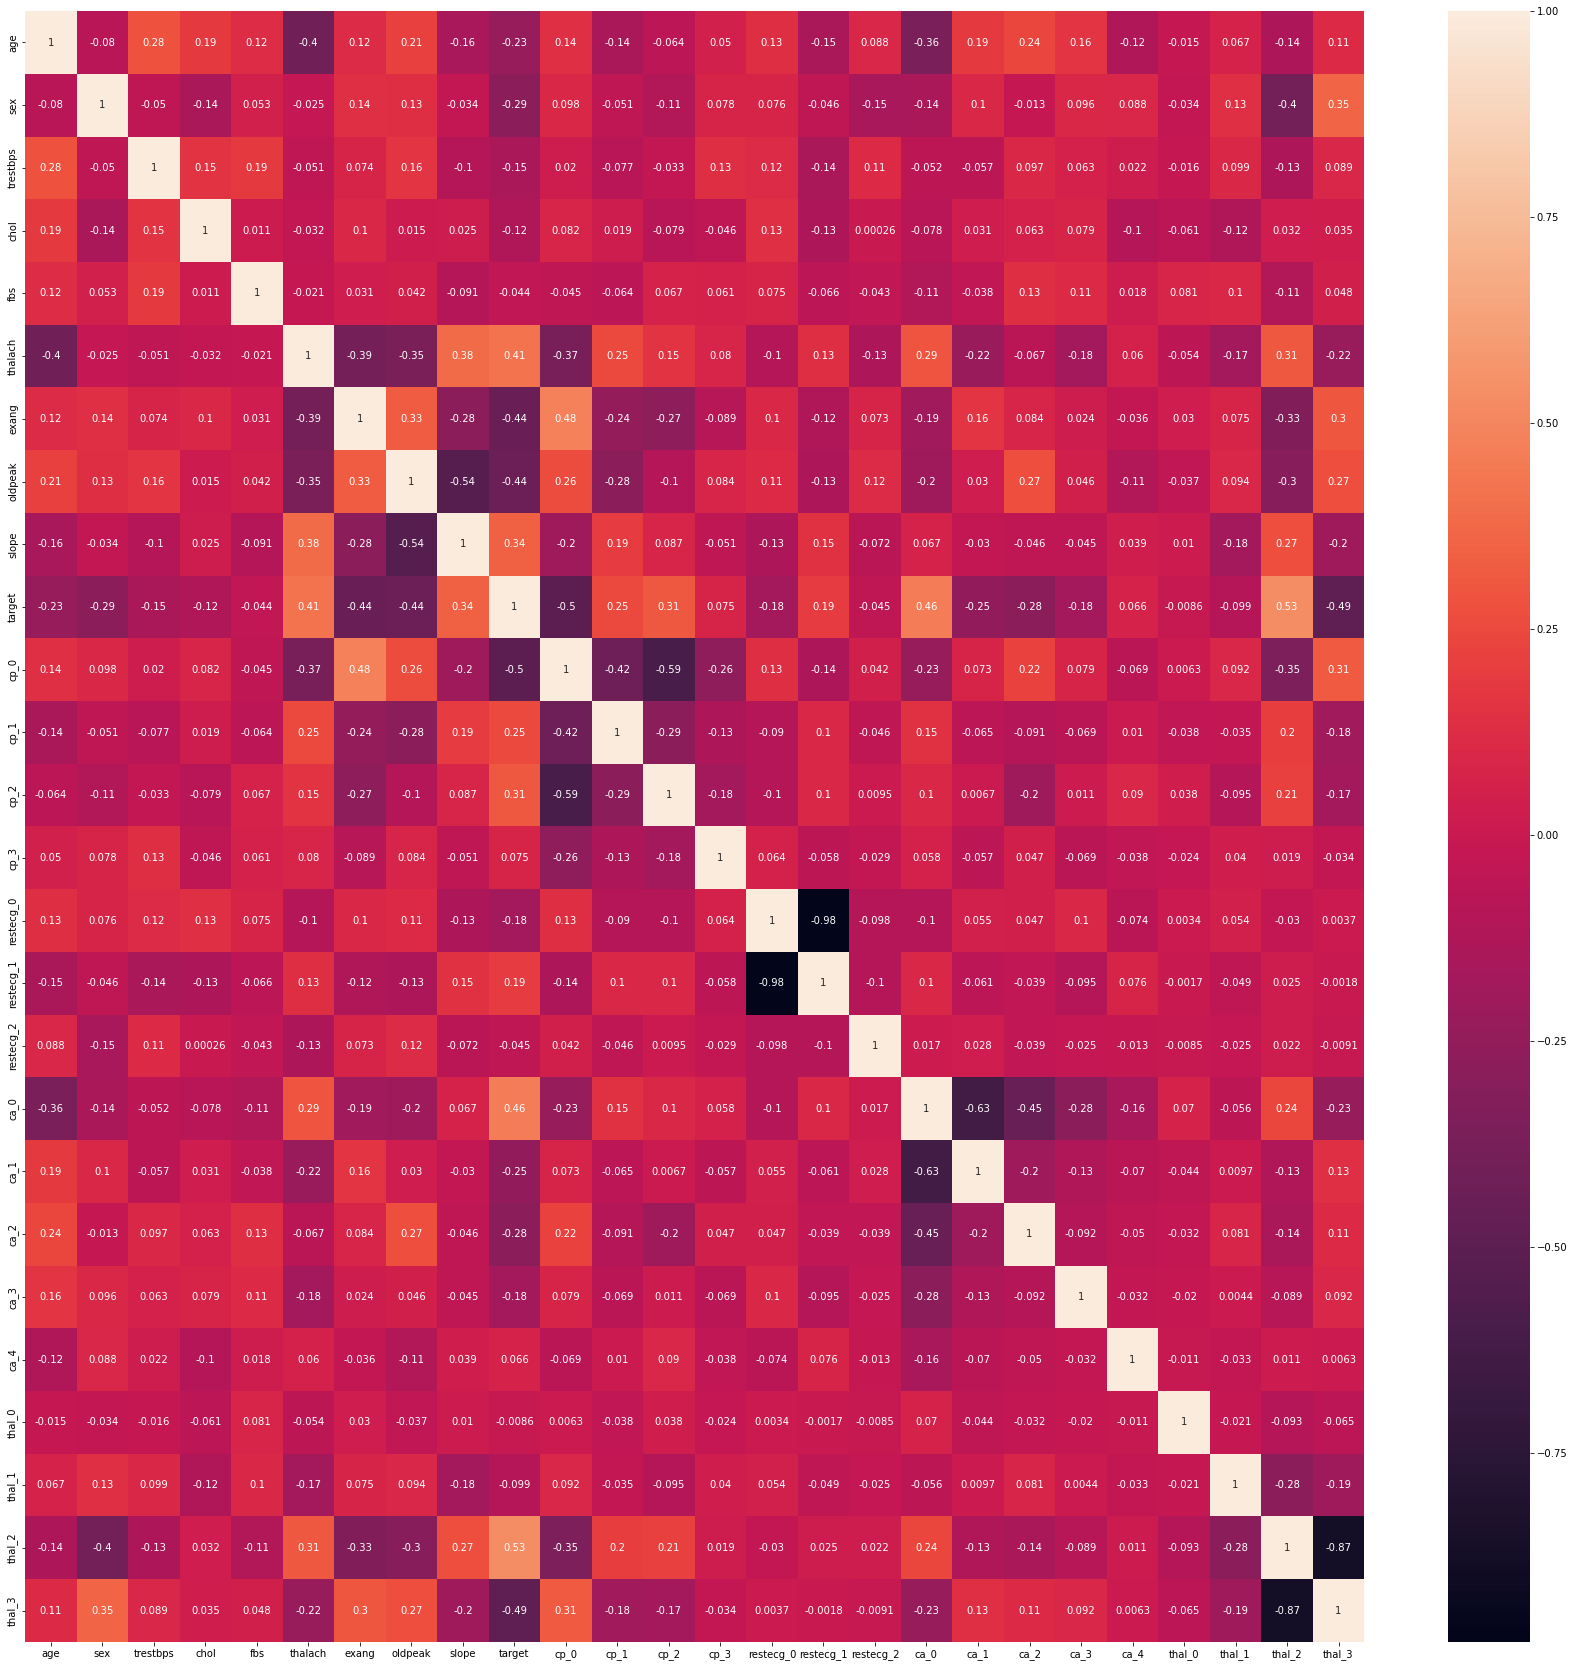

In [131]:
# correlation heatmap 확인
plt.figure(figsize=(30, 30))
sns.heatmap(data.corr(), annot=True)

<AxesSubplot:>

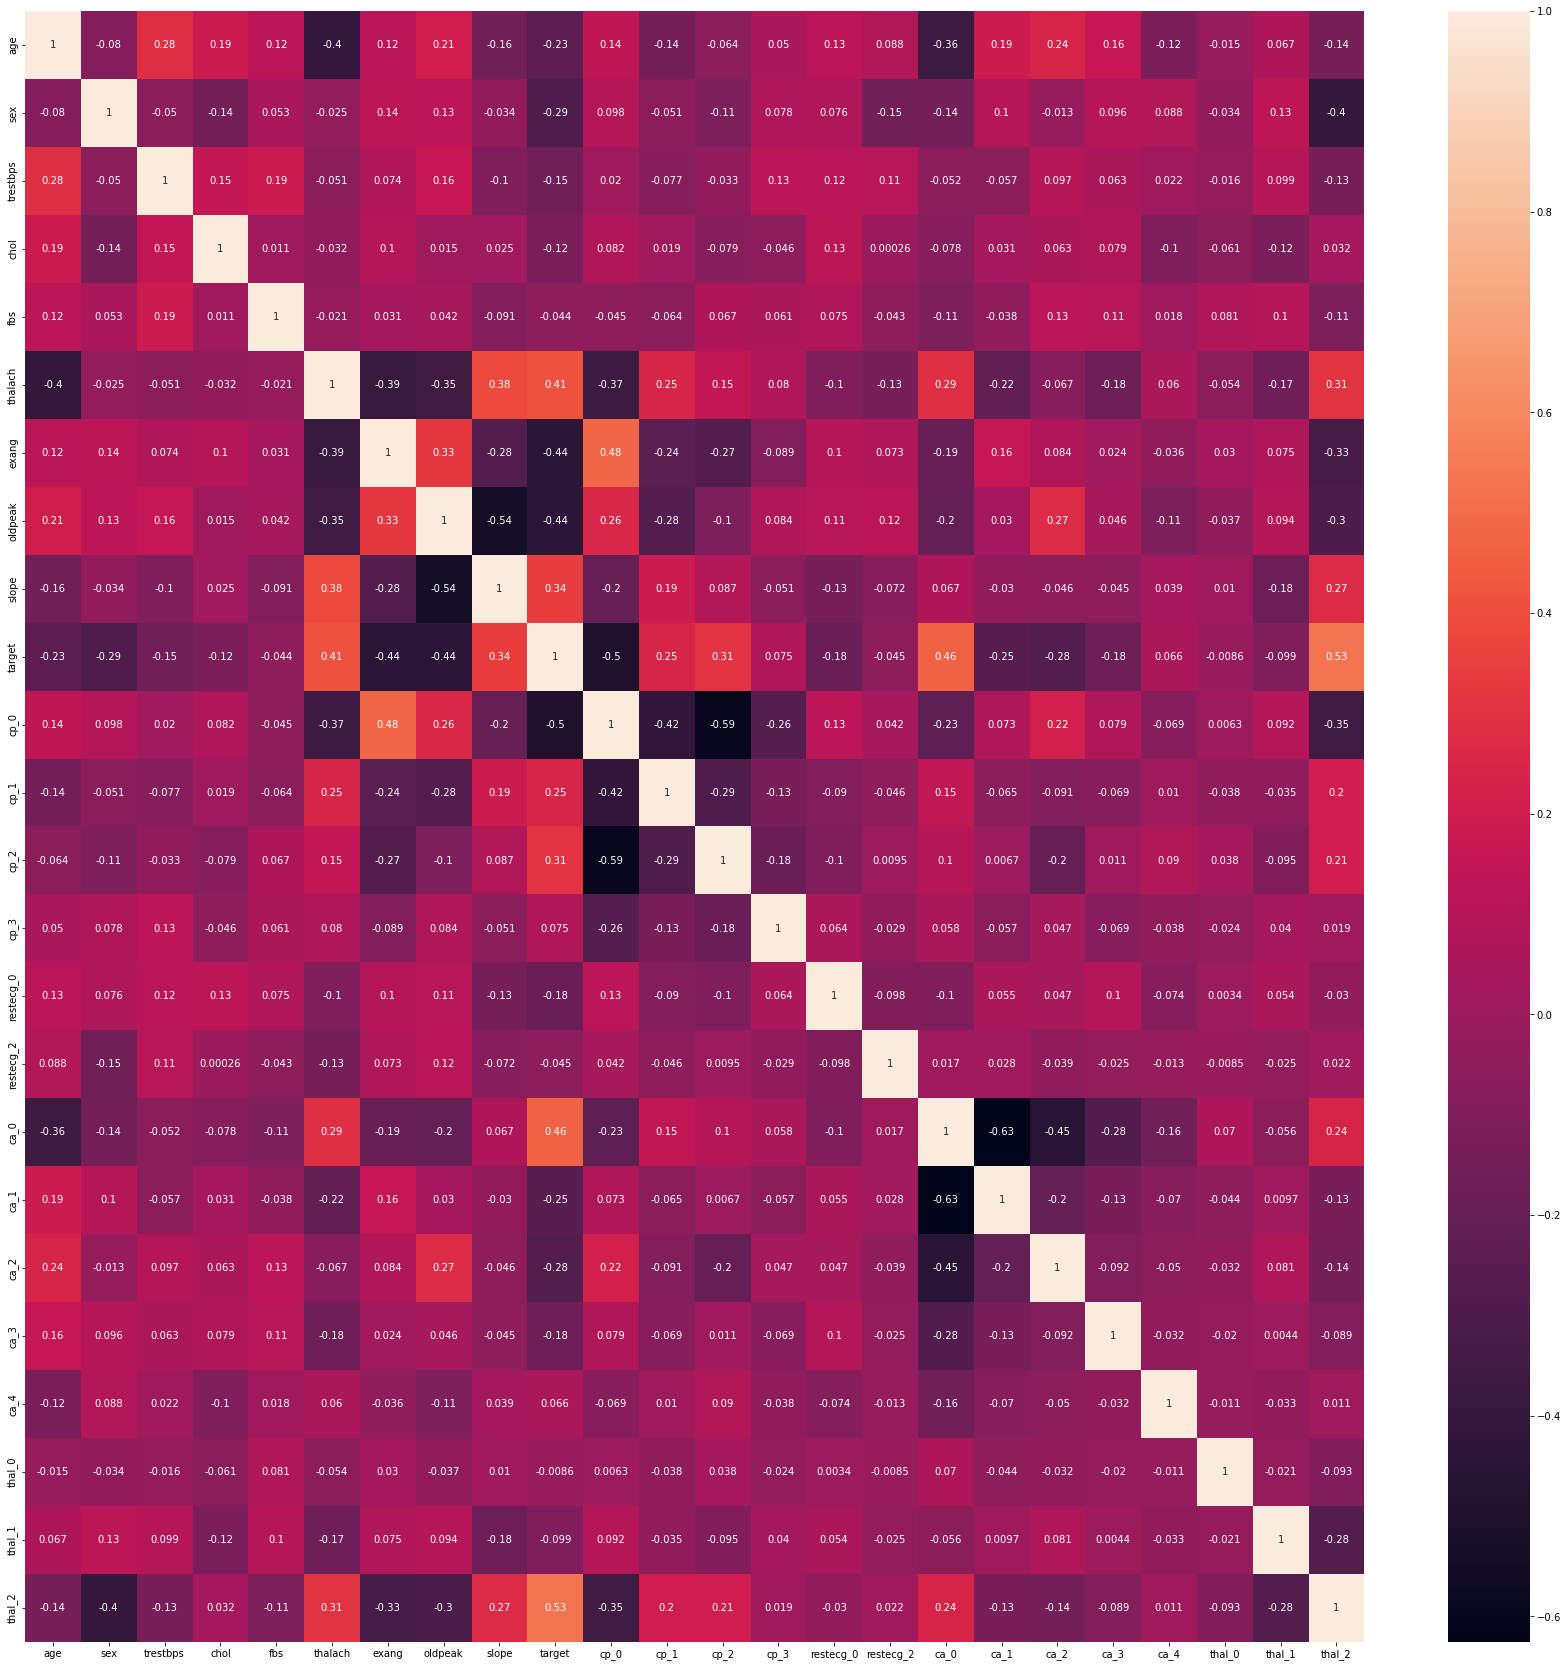

In [132]:
# |correlation| > 0.8 column 제거
data = data.drop(columns=['restecg_1', 'thal_3'])
plt.figure(figsize=(30, 30))
sns.heatmap(data.corr(), annot=True)

## 전처리 완료

In [133]:
data.head()


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,target,...,restecg_0,restecg_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2
0,63,1,145,233,1,150,0,2.3,0,1,...,1,0,1,0,0,0,0,0,1,0
1,37,1,130,250,0,187,0,3.5,0,1,...,0,0,1,0,0,0,0,0,0,1
2,41,0,130,204,0,172,0,1.4,2,1,...,1,0,1,0,0,0,0,0,0,1
3,56,1,120,236,0,178,0,0.8,2,1,...,0,0,1,0,0,0,0,0,0,1
4,57,0,120,354,0,163,1,0.6,2,1,...,0,0,1,0,0,0,0,0,0,1
